In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cs-training.csv', index_col = 0)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# 컬럼값 단순화

In [3]:
df.columns = ['more90_2yrs', 'rev_util', 'age', 'num_30-59_due', 'debt_ratio', 'month_income', 'num_cre_loan', 'num_90late', 'num_REL', 'num_60-89_due', 'num_dependents']
df

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# nan 값 처리 - 중앙값으로 대체

In [4]:
df.isna().sum()

more90_2yrs           0
rev_util              0
age                   0
num_30-59_due         0
debt_ratio            0
month_income      29731
num_cre_loan          0
num_90late            0
num_REL               0
num_60-89_due         0
num_dependents     3924
dtype: int64

In [7]:
df.fillna(df.median(), inplace = True)

In [8]:
df.isna().sum()

more90_2yrs       0
rev_util          0
age               0
num_30-59_due     0
debt_ratio        0
month_income      0
num_cre_loan      0
num_90late        0
num_REL           0
num_60-89_due     0
num_dependents    0
dtype: int64

# rev_util 이상치 수정

In [9]:
# 현재 가용 자금 관련
# 0 -> 1로

In [38]:
df[df['rev_util']>1] = 1

In [39]:
df['rev_util'].value_counts()

0.000000    14199
1.000000    10256
1.000000       17
0.950100        8
0.954092        6
            ...  
0.355181        1
0.217510        1
0.185457        1
0.054679        1
0.373187        1
Name: rev_util, Length: 122595, dtype: int64

In [40]:
df

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,8.311647,0,6,0,0.717467
2,0,0.957151,40,0,0.121876,2600.0,4.000000,0,0,0,0.717467
3,0,0.658180,38,1,0.085113,3042.0,2.000000,1,0,0,0.000000
4,0,0.233810,30,0,0.036050,3300.0,5.000000,0,0,0,0.000000
5,0,0.907239,49,1,0.024926,63588.0,7.000000,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4.000000,0,1,0,0.000000
149997,0,0.299745,44,0,0.716562,5584.0,4.000000,0,1,0,0.717467
149998,0,0.246044,58,0,3870.000000,5400.0,8.311647,0,1,0,0.000000
149999,0,0.000000,30,0,0.000000,5716.0,4.000000,0,0,0,0.000000


In [41]:
df['debt_ratio'].value_counts()

0.000000    8931
1.000000     227
2.000000     164
4.000000     162
3.000000     157
            ... 
0.309049       1
0.005270       1
0.145202       1
0.435404       1
0.486089       1
Name: debt_ratio, Length: 111643, dtype: int64

In [42]:
df.mean()

more90_2yrs          0.058593
rev_util             0.297056
age                 51.319820
num_30-59_due        0.398533
debt_ratio         330.667391
month_income      6300.940440
num_cre_loan         6.297162
num_90late           0.251853
num_REL              1.003140
num_60-89_due        0.230813
num_dependents       0.275660
dtype: float64

In [43]:
# 수입이 없는데 현재 운용 가능한 자금이 지나치게 많은 이상치를 0으로 대체
df.loc[(df.month_income == 0) & (df.debt_ratio > 1), 'debt_ratio'] = 0

In [44]:
df['debt_ratio'].value_counts()

0.000000    8931
1.000000     227
2.000000     164
4.000000     162
3.000000     157
            ... 
0.309049       1
0.005270       1
0.145202       1
0.435404       1
0.486089       1
Name: debt_ratio, Length: 111643, dtype: int64

In [45]:
df

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,8.311647,0,6,0,0.717467
2,0,0.957151,40,0,0.121876,2600.0,4.000000,0,0,0,0.717467
3,0,0.658180,38,1,0.085113,3042.0,2.000000,1,0,0,0.000000
4,0,0.233810,30,0,0.036050,3300.0,5.000000,0,0,0,0.000000
5,0,0.907239,49,1,0.024926,63588.0,7.000000,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4.000000,0,1,0,0.000000
149997,0,0.299745,44,0,0.716562,5584.0,4.000000,0,1,0,0.717467
149998,0,0.246044,58,0,3870.000000,5400.0,8.311647,0,1,0,0.000000
149999,0,0.000000,30,0,0.000000,5716.0,4.000000,0,0,0,0.000000


In [46]:
df[df['num_dependents']>df.num_dependents.mean()]

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,8.311647,0,6,0,0.717467
2,0,0.957151,40,0,0.121876,2600.0,4.000000,0,0,0,0.717467
6,0,0.213179,74,0,0.375607,3500.0,3.000000,0,1,0,0.717467
10,0,0.189169,57,0,0.606291,23684.0,8.311647,0,4,0,0.717467
12,0,0.018798,51,0,0.531529,6501.0,7.000000,0,2,0,0.717467
...,...,...,...,...,...,...,...,...,...,...,...
149987,0,0.168102,49,0,0.080384,5000.0,8.311647,0,0,0,0.717467
149990,0,0.013356,62,0,0.001408,9233.0,4.000000,0,0,0,0.717467
149991,0,0.055518,46,0,0.609779,4335.0,7.000000,0,1,0,0.717467
149993,0,0.871976,50,0,4132.000000,5400.0,8.311647,0,1,0,0.717467


# num_dependents 이상치 수정 - 평균값

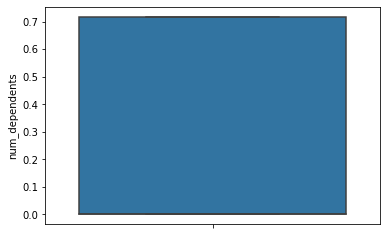

In [47]:
sns.boxplot(x = "num_dependents", orient = "v", data = df)
plt.show()

In [48]:
# 평균값보다 지나치게 높은 outlier들은 평균값으로 대체
df.loc[df.num_dependents > df.num_dependents.mean(), 'num_dependents'] = df.num_dependents.mean()

In [49]:
df.more90_2yrs.value_counts()

0    141211
1      8789
Name: more90_2yrs, dtype: int64

# num_cre_loan 이상치 평균값으로 대체

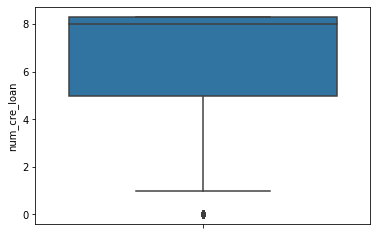

In [50]:
sns.boxplot(x = "num_cre_loan", orient = "v", data = df)
plt.show()

In [51]:
df[df['num_cre_loan']>20]

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents


In [52]:
df.mean()

more90_2yrs          0.058593
rev_util             0.297056
age                 51.319820
num_30-59_due        0.398533
debt_ratio         330.667391
month_income      6300.940440
num_cre_loan         6.297162
num_90late           0.251853
num_REL              1.003140
num_60-89_due        0.230813
num_dependents       0.105912
dtype: float64

In [53]:
df.loc[df.num_cre_loan > df.num_cre_loan.mean(), 'num_cre_loan'] = df.num_cre_loan.mean()

In [54]:
df.mean()

more90_2yrs          0.058593
rev_util             0.297056
age                 51.319820
num_30-59_due        0.398533
debt_ratio         330.667391
month_income      6300.940440
num_cre_loan         5.248100
num_90late           0.251853
num_REL              1.003140
num_60-89_due        0.230813
num_dependents       0.105912
dtype: float64

# 데이터셋 나누기

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['more90_2yrs'])
y = df.more90_2yrs
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# 학습

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=6, max_features=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 예측

In [57]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score
rf_pred_proba_train = rf.predict_proba(X_train)
rf_pred_proba_test = rf.predict_proba(X_test)

# 평가

In [58]:
def print_metrics(y, pred, title = None):
    acc = accuracy_score(y,pred)
    recall = recall_score(y,pred)
    precision = precision_score(y,pred)
    f1 = f1_score(y,pred)
    
    if title:
        print('title')
    print(f'정확도:{acc}, 재현율:{recall}, 정밀도:{precision}, f1:{f1}')

In [59]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [60]:
print_metrics(y_train, rf_train_pred, "RF-Train")

title
정확도:0.9459288888888889, 재현율:0.16095266990291263, 정밀도:0.6577805331680099, f1:0.25862279098110913


In [61]:
print_metrics(y_test, rf_test_pred, "RF-Train")

title
정확도:0.94368, 재현율:0.1306326809285389, 정밀도:0.5869120654396728, f1:0.2137006701414743


In [62]:
rf_train_score = roc_auc_score(y_train, rf_pred_proba_train[:, 1])
rf_test_score = roc_auc_score(y_test, rf_pred_proba_test[:, 1])
print('RandomForest Roc Score - train : {}, test - {}'.format(rf_train_score, rf_test_score))

RandomForest Roc Score - train : 0.856807377050965, test - 0.8436512059955731


# 적당한 max_depth 찾기

In [35]:
depth_list = range(1, 11)

In [36]:
train_acc_list = []
test_acc_list = []

In [37]:
for depth in depth_list:
    rf = RandomForestClassifier(max_depth = depth)
    rf.fit(X_train, y_train)
    
    pred_train = rf.predict(X_train)
    pred_test = rf.predict(X_test)
    
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    
    train_acc_list.append(acc_train)
    test_acc_list.append(acc_test)

C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

In [55]:
train_acc_list

[0.9414044444444445,
 0.9414044444444445,
 0.9414044444444445,
 0.94328,
 0.9436711111111111,
 0.9450488888888889,
 0.9457333333333333,
 0.9467822222222222,
 0.9487911111111111,
 0.9512533333333333]

In [56]:
test_acc_list

[0.9414133333333333,
 0.9414133333333333,
 0.9414133333333333,
 0.94344,
 0.9435466666666666,
 0.94376,
 0.9430933333333333,
 0.94352,
 0.9430133333333334,
 0.94296]

In [59]:
import pandas as pd
df_1 = pd.DataFrame({'Train': train_acc_list, 'Test': test_acc_list}, 
                  index = depth_list)
df_1

,Train,Test
1,0.941404,0.941413
2,0.941404,0.941413
3,0.941404,0.941413
4,0.943280,0.943440
5,0.943671,0.943547
6,0.945049,0.943760
7,0.945733,0.943093
8,0.946782,0.943520
9,0.948791,0.943013
10,0.951253,0.942960


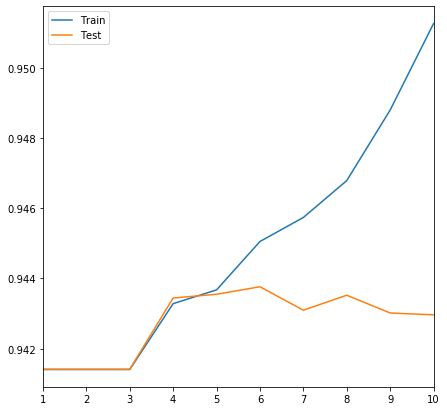

In [60]:
df_1.plot(figsize = (7, 7));

# max depth 수정

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=6, max_features=10)
rf.fit(X_train, y_train)

rf_pred_proba_train = rf.predict_proba(X_train)
rf_pred_proba_test = rf.predict_proba(X_test)

rf_train_score = roc_auc_score(y_train, rf_pred_proba_train[:, 1])
rf_test_score = roc_auc_score(y_test, rf_pred_proba_test[:, 1])
print('RandomForest Roc Score - train : {}, test - {}'.format(rf_train_score, rf_test_score))